In [59]:
import pandas as pd
import matplotlib.pyplot as plt

PATH = './covid19mobility_report.csv'

dfcovid = pd.read_csv(PATH)  #, names = headers
dfcovid["date"] = pd.to_datetime(dfcovid["date"])
#dfcovid.head()
dfunitedstates = dfcovid[dfcovid["country_region"]=="United States"]


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:

places=pd.DataFrame(dfunitedstates["place_id"].value_counts())
places.reset_index(inplace=True)
places = places.rename(columns = {'index':'place_id', "place_id":"COUNT" })
places_indices = pd.DataFrame(places["place_id"].iloc[:2800])

dfunitedstates = dfunitedstates[dfunitedstates.place_id.isin(places_indices.place_id)]
nydf=dfunitedstates[dfunitedstates["sub_region_1"]=="New York"]

#dfunitedstates["place_id"].value_counts()
nydf.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4673737,US,United States,New York,Albany County,NaN,NaN,36001.0,ChIJKXDqHfHY3YkR58pus3faMs8,2020-09-23,-25.0,-3.0,57.0,-38.0,-40.0,12.0
4673738,US,United States,New York,Albany County,NaN,NaN,36001.0,ChIJKXDqHfHY3YkR58pus3faMs8,2020-10-14,-26.0,-2.0,53.0,-37.0,-38.0,12.0
4673739,US,United States,New York,Albany County,NaN,NaN,36001.0,ChIJKXDqHfHY3YkR58pus3faMs8,2020-12-04,-31.0,-4.0,3.0,-47.0,-39.0,16.0
4673740,US,United States,New York,Albany County,NaN,NaN,36001.0,ChIJKXDqHfHY3YkR58pus3faMs8,2021-01-20,-41.0,-18.0,-32.0,-53.0,-45.0,17.0
4673741,US,United States,New York,Albany County,NaN,NaN,36001.0,ChIJKXDqHfHY3YkR58pus3faMs8,2021-04-26,-18.0,3.0,48.0,-38.0,-41.0,11.0


In [117]:
fipsids = pd.DataFrame(nydf["census_fips_code"].value_counts())
fipsids.reset_index(inplace=True)
fipsids = fipsids.rename(columns = {'index':'census_fips_code', "census_fips_code":"COUNT" })

fips_headers = ["Ney York County", "Kings County", "Queens County", "Bronx County", "Richmond County"]



NYC_df=nydf[nydf["sub_region_2"]=="New York County"]
NYC_df=NYC_df.sort_values(by='date')


Kings_df=nydf[nydf["sub_region_2"]=="Kings County"]
Kings_df=Kings_df.sort_values(by='date')

Queens_df=nydf[nydf["sub_region_2"]=="Queens County"]
Queens_df=Queens_df.sort_values(by='date')

Bronx_df=nydf[nydf["sub_region_2"]=="Bronx County"]
Bronx_df=Bronx_df.sort_values(by='date')

Richmond_df=nydf[nydf["sub_region_2"]=="Richmond County"]
Richmond_df=Richmond_df.sort_values(by='date')



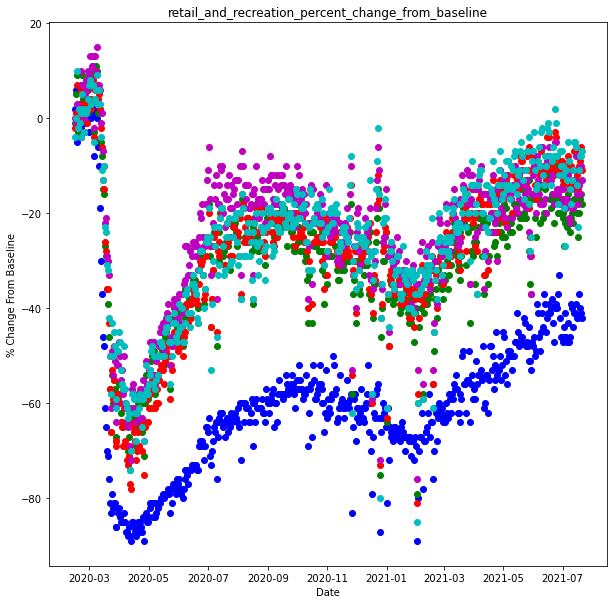

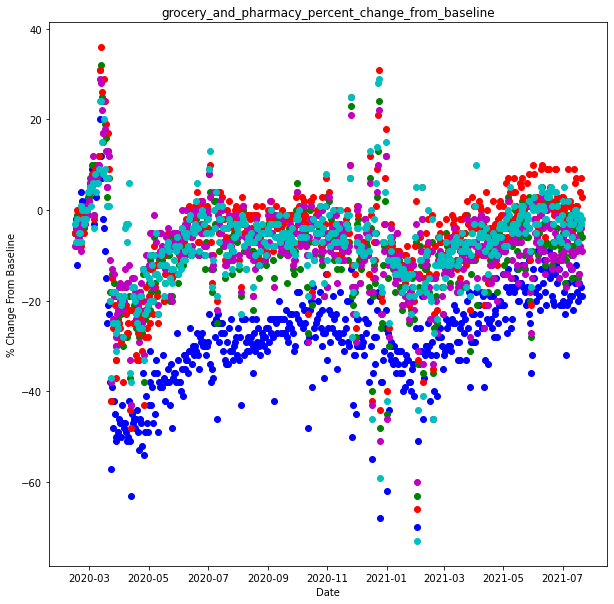

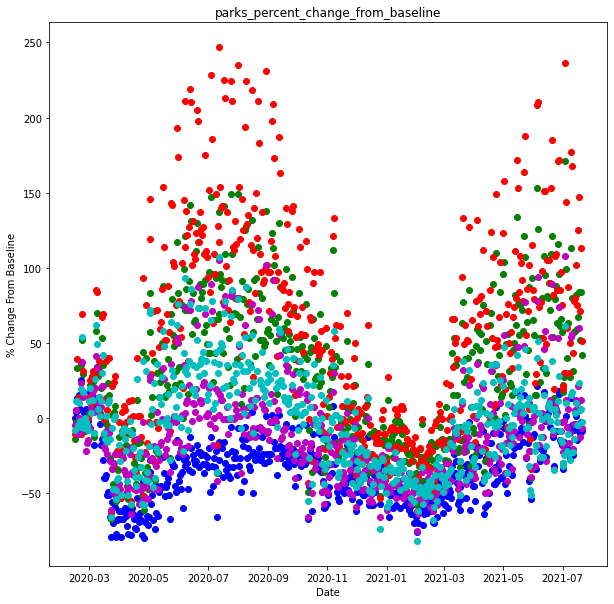

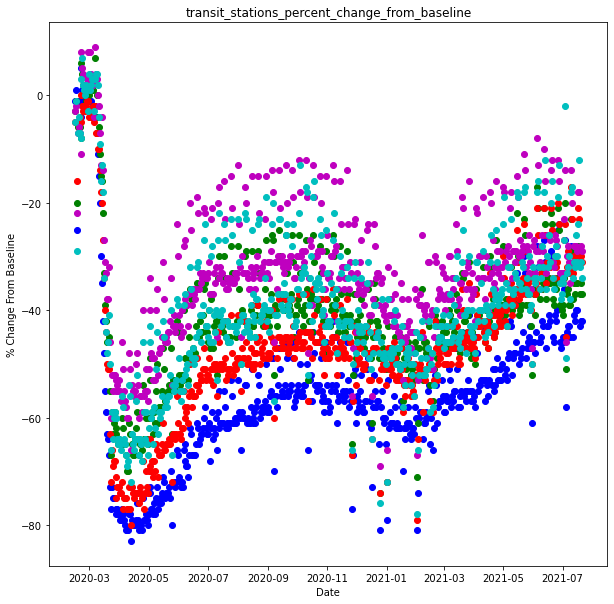

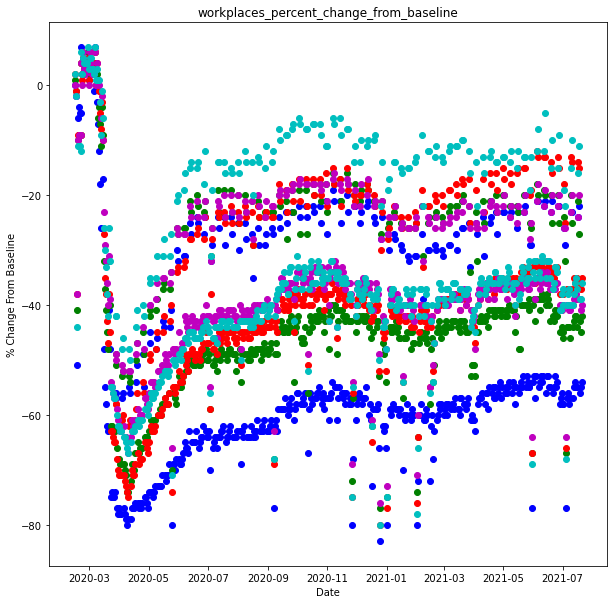

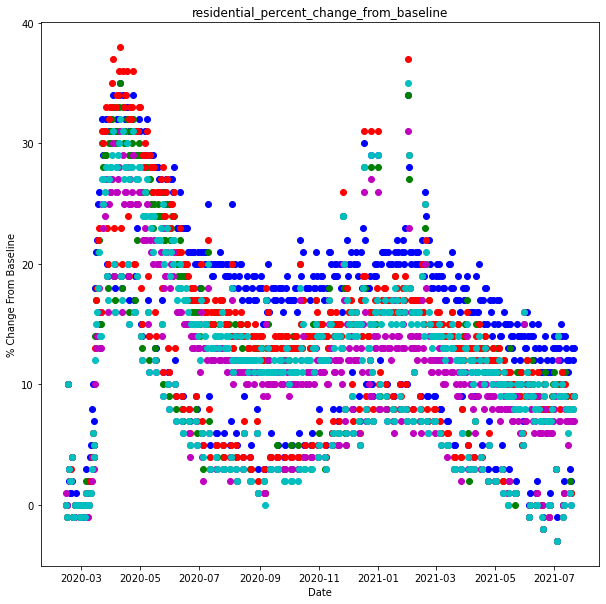

In [130]:
%matplotlib inline 

headers = ["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline",
          "parks_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline",
          "residential_percent_change_from_baseline"]

ind=0
for header in headers: 
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(NYC_df['date'],
        NYC_df[header],'ob')

    ax.plot(Kings_df['date'],
        Kings_df[header],'og')

    ax.plot(Queens_df['date'],
        Queens_df[header],'or')
 
    ax.plot(Bronx_df['date'],
        Bronx_df[header],'om')
    
    ax.plot(Richmond_df['date'],
        Richmond_df[header],'oc')

    ax.set(xlabel="Date",
       ylabel="% Change From Baseline",
       title=header)
    plt.show()
    ind=ind+1
    

    
    